# How we might measure the PANOSETI PSF

Nik Korzoun <br>
12/7/23

Suppose we had a point source at infinity with a spectrum similar to that of Cherenkov showers. If we let this source travel across the field of view of a PANOSETI telescope, we can measure the intensity of light in a pixel that lies on its path and use that to characterize the PSF.

Here I make the argument that a B-type star with a surface temperature close to 12,000 K will approximate the Chernekov spectrum.

## Python Imports

In [336]:
import numpy as np
from matplotlib import pyplot as plt
import astropy.units as u
import astropy.constants as c

## Cherenkov Spectrum
Cherenkov emission goes as roughly ~1/$\lambda^2$, but atmospheric scattering will cause a cutoff near 300nm. Absorption from the Fresnel lens will dominate from 400nm and below so the exact cutoff is not important here.

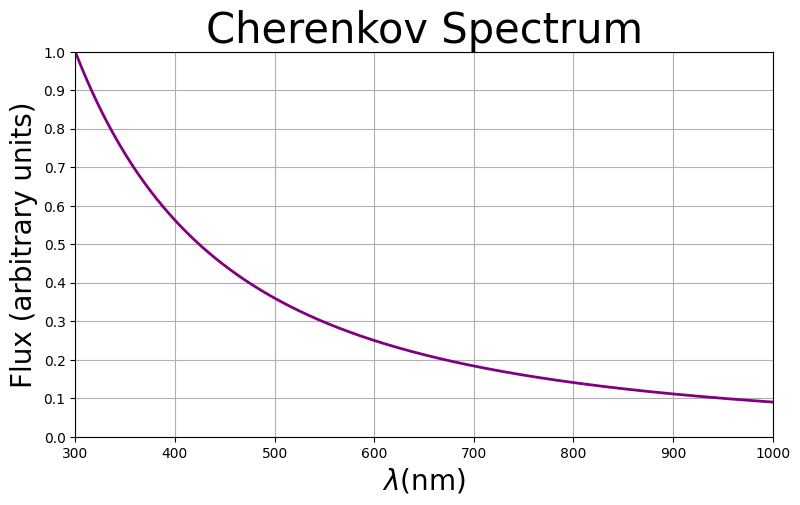

In [337]:
fig = plt.figure(figsize=(9,5))
plt.title("Cherenkov Spectrum",fontsize=30) 
plt.xlabel(r'$\lambda$(nm)',fontsize=20)
plt.ylabel("Flux (arbitrary units)", fontsize=20)
plt.yticks(np.arange(0,1.1,0.1))
plt.xlim(300,1000)
plt.ylim(0,1)

x=np.linspace(1,1000,1000)
cherenkov = 90000/(x*x) # scaling such that peak Cherenkov emission occurs at 300 nm

plt.plot(x,cherenkov ,c='purple',lw=2,label='Cherenkov')

plt.grid()
plt.show()

## Fresnel lens transmission efficiency
Here I am modelling the transmission curve as a sigmoid function. The values I use here are derived from a fit in another python notebook using data from [C. Joram 2009](https://cds.cern.ch/record/1214725/files/PH-EP-Tech-Note-2009-003.pdf)

In [338]:
def sigmoid(x,k,L,x0):
    denom = 1.+np.exp(-k*(x-x0))
    s = L/denom
    return s

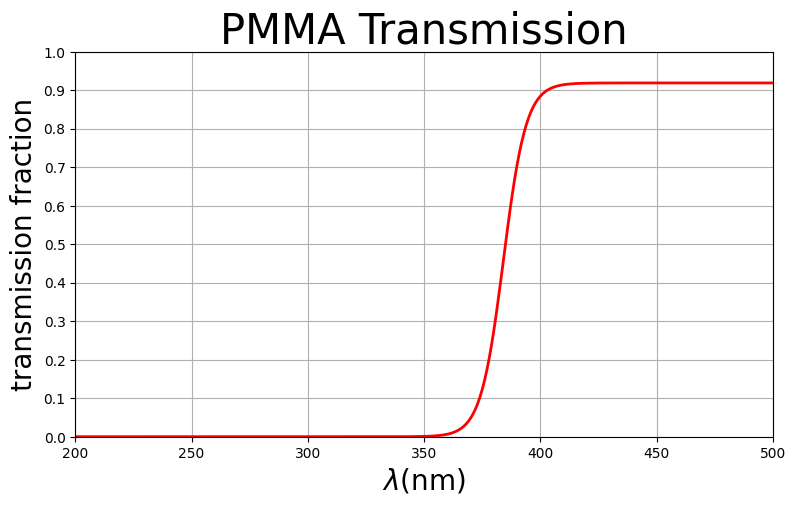

In [339]:
params = [2.04647724e-01, 9.18909275e-01, 3.84163423e+02]
fresnel=sigmoid(x,*params)

fig = plt.figure(figsize=(9,5))
plt.title("PMMA Transmission",fontsize=30) 
plt.xlabel(r'$\lambda$(nm)',fontsize=20)
plt.xlim(200,500)
plt.ylabel("transmission fraction",fontsize=20)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim(0,1)

plt.plot(x,fresnel,c='red',lw=2)

plt.grid()
plt.show()

## Stellar spectra
Here we assume a blackbody spectrum for the star.

Blue stars will more closely match the blue light seen in Cherenkov showers. Letting $T=12,000K$ seems to match reasonably well.
Regulus and Rigel have surface temperatures at roughly this value, but perhaps they are too bright, at 0th and 1st magnitude (V-band) respectively, thus risking saturation.

In [340]:
def blackbody(x,T):
    a=2*c.h*c.c**2/(x**5)
    b=np.exp(c.h*c.c/(x*c.k_B*T))-1
    return a/b

In [341]:
def norm_stellar_flux(T):
    flux = np.pi*blackbody((x*u.nm).to(u.m),T) # converting intensity to flux
    return flux/np.max(flux) # normalizing

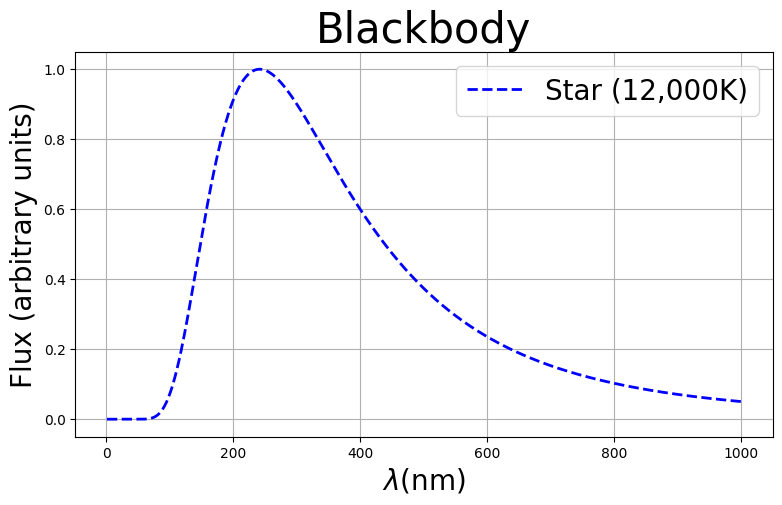

In [342]:
fig = plt.figure(figsize=(9,5))
plt.title("Blackbody",fontsize=30) 
plt.xlabel(r'$\lambda$(nm)',fontsize=20)
plt.ylabel("Flux (arbitrary units)",fontsize=20)

plt.plot(x,norm_stellar_flux(12000*u.K),c='blue',lw=2,
    label='Star (12,000K)', ls='dashed')

plt.legend(loc='upper right', fontsize=20)
plt.grid()
plt.show()

## Convolution

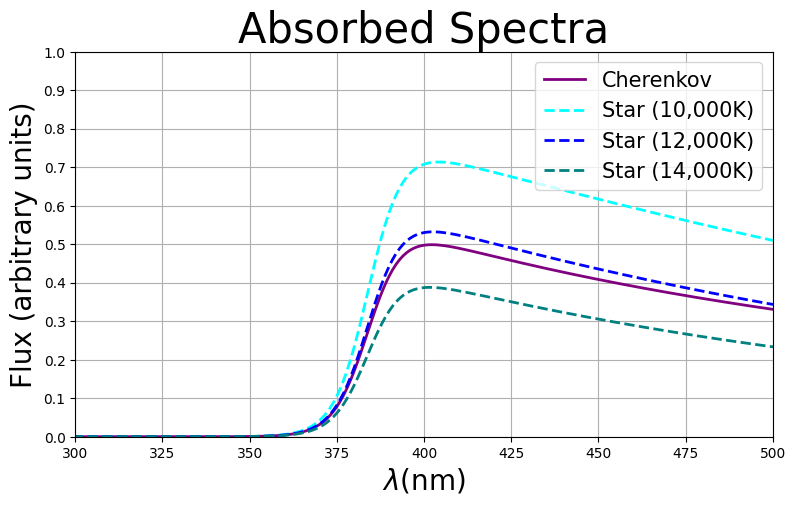

In [343]:
fig = plt.figure(figsize=(9,5))
plt.title("Absorbed Spectra",fontsize=30) 
plt.xlabel(r'$\lambda$(nm)',fontsize=20)
plt.xlim(300,500)
plt.ylabel("Flux (arbitrary units)",fontsize=20)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim(0,1)

plt.plot(x,cherenkov*fresnel,c='purple',lw=2,label='Cherenkov')
plt.plot(x,norm_stellar_flux(10000*u.K)*fresnel,c='cyan',lw=2,
    label='Star (10,000K)',ls='dashed') # 10,000 K
plt.plot(x,norm_stellar_flux(12000*u.K)*fresnel,c='blue',lw=2,
    label='Star (12,000K)',ls='dashed') # 12,000 K
plt.plot(x,norm_stellar_flux(14000*u.K)*fresnel,c='teal',lw=2, 
    label='Star (14,000K)',ls='dashed') # 14,000 K

plt.legend(loc='upper right',fontsize=15)
plt.grid()
plt.show()